### Module 7: Deep learning – Neural Networks
#### Nutta Sittirash

In [262]:
import pandas as pd
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'
df = pd.read_csv(url)
df.head(5)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:06,10261,44417,3,69,0,82,33,99.925373
1,01/05/2022 07:20,10261,45544,3,35,0,82,52,100.191176
2,01/05/2022 07:35,10261,44410,3,7,0,82,10,99.681159
3,01/05/2022 07:51,10261,41724,3,74,15,82,27,99.385714
4,01/05/2022 20:16,10261,45544,3,-3,0,109,17,116.298507


In [263]:
df.shape

(4962, 9)

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           4962 non-null   object 
 1   Stop_id                4962 non-null   int64  
 2   Bus_id                 4962 non-null   int64  
 3   Line_id                4962 non-null   int64  
 4   Arrival_delay          4962 non-null   int64  
 5   Dwell_time             4962 non-null   int64  
 6   Scheduled_travel_time  4962 non-null   int64  
 7   Upstream_stop_delay    4962 non-null   int64  
 8   Recurrent_delay        4962 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 349.0+ KB


In [265]:
max_delay_row = df[df['Arrival_delay'] == df['Arrival_delay'].max()]
print(max_delay_row)

          Arrival_time  Stop_id  Bus_id  Line_id  Arrival_delay  Dwell_time  \
4503  25/05/2022 06:42    10261   44418        4           1846           0   

      Scheduled_travel_time  Upstream_stop_delay  Recurrent_delay  
4503                    120                 1812       155.141844  


In [266]:
df = df.iloc[:1000]
df = df.drop(['Arrival_time','Stop_id', 'Bus_id', 'Line_id'], axis = 1)

<Axes: xlabel='Arrival_delay', ylabel='Count'>

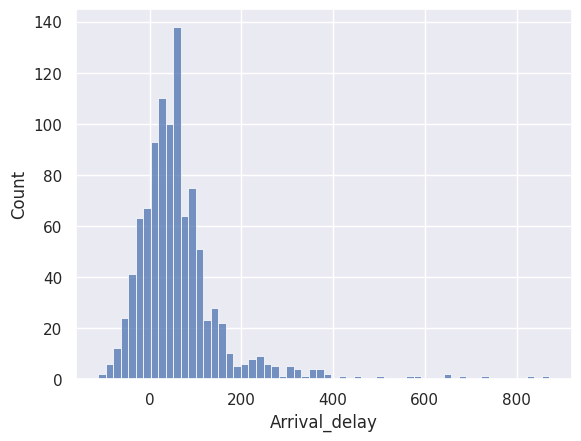

In [267]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.histplot(x=df['Arrival_delay'])

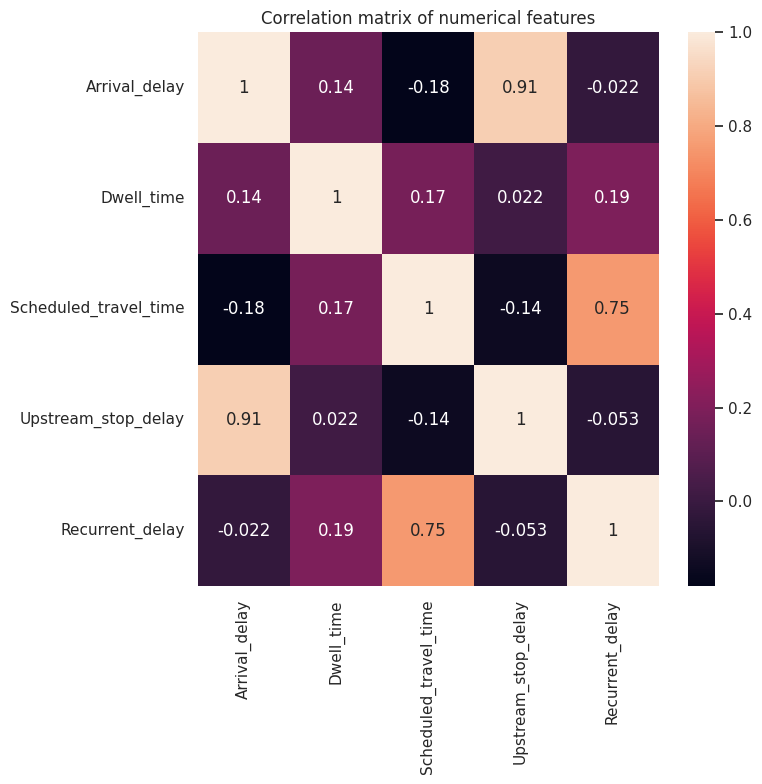

In [268]:
corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)
plt.subplots(figsize=(8,8))
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

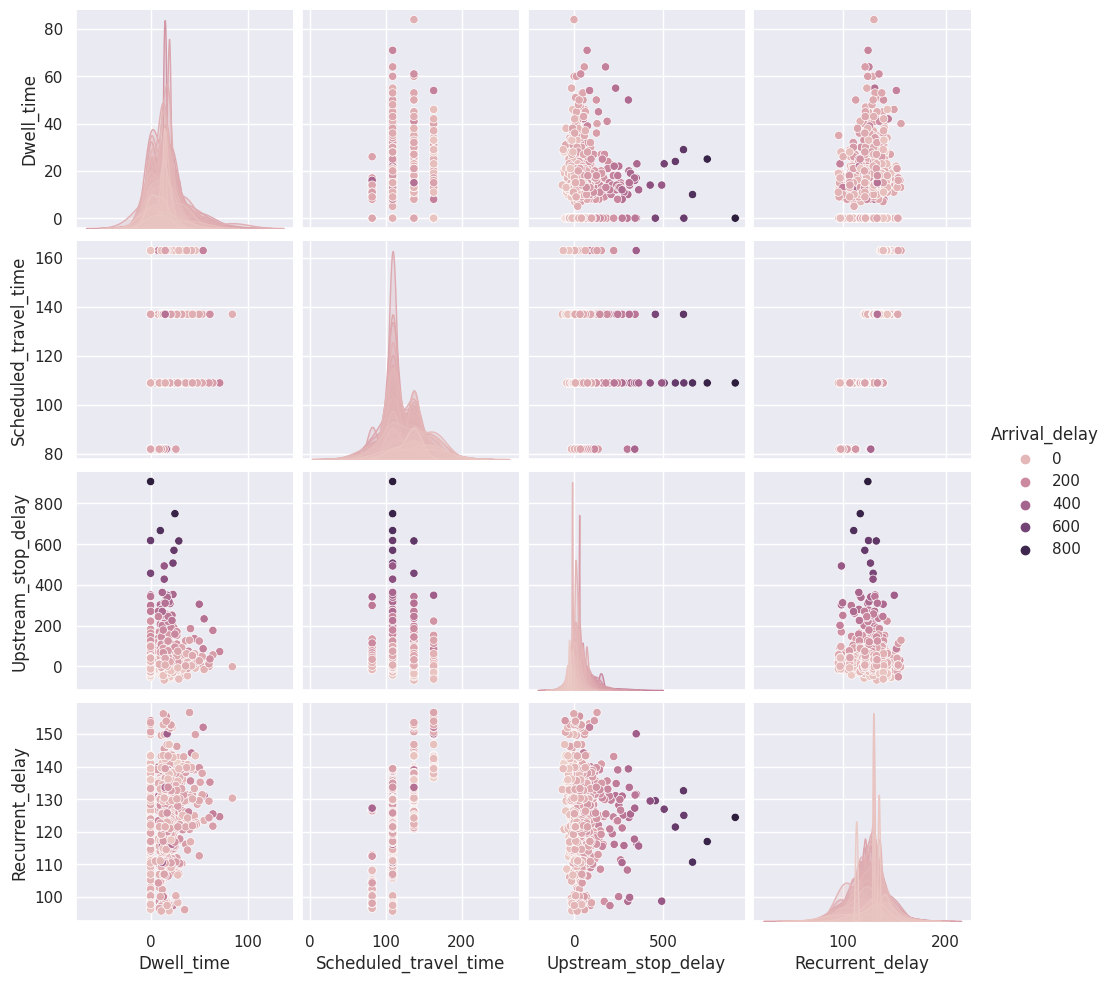

In [269]:
import pandas as pd

# create a DataFrame 'x' containing all columns except 'Arrival_delay'
x = df.drop(['Arrival_delay'], axis=1)
# Create a Series 'y' containing only the 'Arrival_delay' column.
y = df['Arrival_delay']

combined_data = pd.concat([x, y], axis=1)
# use seaborn's pairplot to visualize pairwise relationships between the features in 'x'
sns.pairplot(combined_data, hue='Arrival_delay', diag_kind='kde')

### Model1: Create a NN model

In [270]:
pip install --upgrade tensorflow

In [271]:
# data processing
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'
df = pd.read_csv(url)
df = df.iloc[:1000]
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [272]:
# network construction
def construct_network_model():
  model_1 = Sequential()
  model_1.add(Dense(32, activation='relu', input_dim=4))
  model_1.add(Dense(64, activation='relu'))
  model_1.add(Dense(1))
  return model_1

model_1 = construct_network_model()
model_1.compile(optimizer='adam', loss='mae', metrics=['mae'])
model_1.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_186 (Dense)           (None, 32)                160       
                                                                 
 dense_187 (Dense)           (None, 64)                2112      
                                                                 
 dense_188 (Dense)           (None, 1)                 65        
                                                                 
Total params: 2337 (9.13 KB)
Trainable params: 2337 (9.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Epoch 1: val_mae improved from inf to 45.38520, saving model to weights.best.h5

Epoch 2: val_mae improved from 45.38520 to 32.73612, saving model to weights.best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae did not improve from 32.73612

Epoch 4: val_mae improved from 32.73612 to 32.16606, saving model to weights.best.h5

Epoch 5: val_mae improved from 32.16606 to 31.42163, saving model to weights.best.h5

Epoch 6: val_mae did not improve from 31.42163

Epoch 7: val_mae did not improve from 31.42163

Epoch 8: val_mae did not improve from 31.42163

Epoch 9: val_mae did not improve from 31.42163

Epoch 10: val_mae improved from 31.42163 to 31.32032, saving model to weights.best.h5

Epoch 11: val_mae did not improve from 31.32032

Epoch 12: val_mae improved from 31.32032 to 30.71537, saving model to weights.best.h5

Epoch 13: val_mae did not improve from 30.71537

Epoch 14: val_mae did not improve from 30.71537

Epoch 15: val_mae did not improve from 30.71537

Epoch 16: val_mae did not improve from 30.71537

Epoch 17: val_mae did not improve from 30.71537
7/7 [==============================] - 0s 2ms/step
--------------------------------------this is result of the trained m

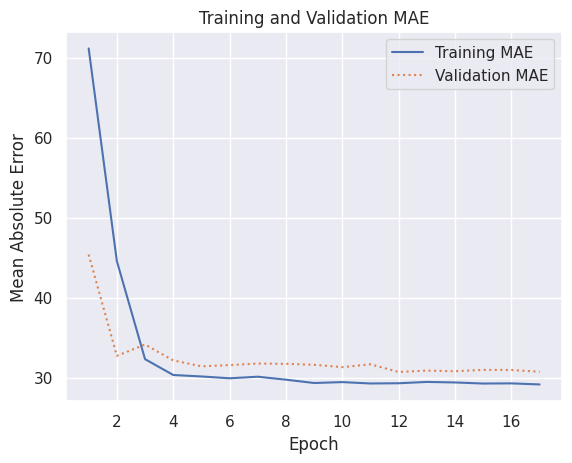

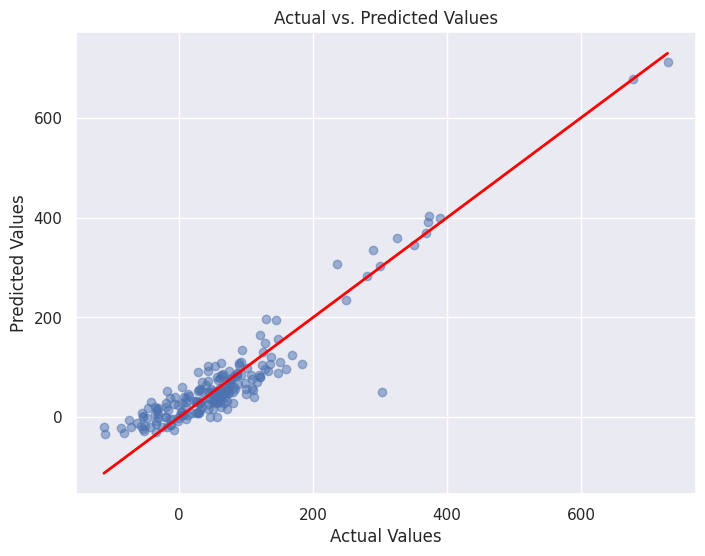

In [273]:
# model training -- choose to use callback function
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
filepath=""

early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)
filepath = "weights.best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
hist = model_1.fit(x_train, y_train, validation_split=0.2, epochs=29, batch_size=14, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

# model evaluation and plot
sns.set()
err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

y_pred = model_1.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Load model and evaluation
if not filepath =="":
  model_1 = load_model(filepath)
  y_pred = model_1.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")

  # create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha = 0.5)

  # add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # add a diagonal line for reference
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle = '-', color = 'red', lw=2)
  plt.show()

### Model2: Tuning the neural network models (e.g., dropout, sizing of the network), and finding the best neural network model.

In [274]:
# data processing
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split


url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'
df = pd.read_csv(url)
df = df.iloc[:1000]
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [275]:
# network construction
def construct_network_model():
  model_2 = Sequential()
  model_2.add(Dense(64, activation='relu', input_dim=4))
  model_2.add(Dense(128, activation='relu'))
  model_2.add(Dense(1))
  return model_2

model_2 = construct_network_model()
model_2.compile(optimizer='adam', loss='mae', metrics=['mae'])
model_2.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_189 (Dense)           (None, 64)                320       
                                                                 
 dense_190 (Dense)           (None, 128)               8320      
                                                                 
 dense_191 (Dense)           (None, 1)                 129       
                                                                 
Total params: 8769 (34.25 KB)
Trainable params: 8769 (34.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Epoch 1: val_mae improved from inf to 32.66483, saving model to weights.best.h5

Epoch 2: val_mae did not improve from 32.66483


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae improved from 32.66483 to 31.19025, saving model to weights.best.h5

Epoch 4: val_mae did not improve from 31.19025

Epoch 5: val_mae did not improve from 31.19025

Epoch 6: val_mae did not improve from 31.19025

Epoch 7: val_mae improved from 31.19025 to 30.65830, saving model to weights.best.h5

Epoch 8: val_mae did not improve from 30.65830

Epoch 9: val_mae did not improve from 30.65830

Epoch 10: val_mae did not improve from 30.65830

Epoch 11: val_mae did not improve from 30.65830

Epoch 12: val_mae did not improve from 30.65830
7/7 [==============================] - 0s 3ms/step
--------------------------------------this is result of the trained model---------------------------------------------
Mean Absolute Error: 29.090405719205737
Mean Squared Error: 1507.9485267870273
R-squared: 0.872185984590475
7/7 [==============================] - 0s 3ms/step
--------------------------------------this is result of the model loaded from the local path--------------------

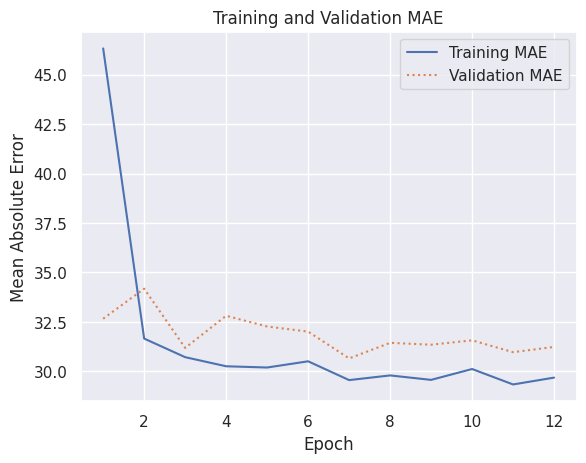

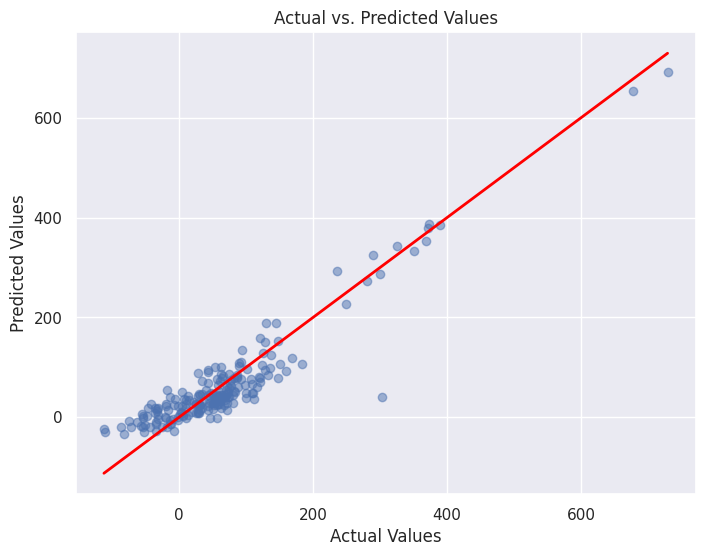

In [276]:
# model training -- choose to use callback function
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
filepath=""

early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)
filepath = "weights.best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
hist = model_2.fit(x_train, y_train, validation_split=0.2, epochs=33, batch_size=18, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

# model evaluation and plot
sns.set()
err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

y_pred = model_2.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Load model and evaluation
if not filepath =="":
  model_2 = load_model(filepath)
  y_pred = model_2.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")

  # create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha = 0.5)

  # add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # add a diagonal line for reference
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle = '-', color = 'red', lw=2)
  plt.show()

### Model3: Tuning the neural network models (e.g., dropout, sizing of the network), and finding the best neural network model.

In [277]:
# data processing
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split


url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'
df = pd.read_csv(url)
df = df.iloc[:1000]
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [278]:
# network construction
from tensorflow.keras.layers import PReLU
def construct_network_model():
  model_3 = Sequential()
  model_3.add(Dense(32, activation='relu', input_dim=4))
  model_3.add(Dense(64, activation='relu'))
  model_3.add(Dense(1))
  return model_3

model_3 = construct_network_model()
# model_3.compile(optimizer=Adam(learning_rate=0.02), loss='mae', metrics=['mae'])
model_3.compile(optimizer='adam', loss='mae', metrics=['mae'])
model_3.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_192 (Dense)           (None, 32)                160       
                                                                 
 dense_193 (Dense)           (None, 64)                2112      
                                                                 
 dense_194 (Dense)           (None, 1)                 65        
                                                                 
Total params: 2337 (9.13 KB)
Trainable params: 2337 (9.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Epoch 1: val_mae improved from inf to 62.32723, saving model to weights.best.h5

Epoch 2: val_mae improved from 62.32723 to 44.31678, saving model to weights.best.h5

Epoch 3: val_mae improved from 44.31678 to 36.45945, saving model to weights.best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_mae improved from 36.45945 to 33.17065, saving model to weights.best.h5

Epoch 5: val_mae did not improve from 33.17065

Epoch 6: val_mae did not improve from 33.17065

Epoch 7: val_mae did not improve from 33.17065

Epoch 8: val_mae did not improve from 33.17065

Epoch 9: val_mae did not improve from 33.17065
7/7 [==============================] - 0s 2ms/step
--------------------------------------this is result of the trained model---------------------------------------------
Mean Absolute Error: 34.735394799038765
Mean Squared Error: 2120.7932757701706
R-squared: 0.8202411424431935
7/7 [==============================] - 0s 2ms/step
--------------------------------------this is result of the model loaded from the local path---------------------------------------------
Mean Absolute Error: 34.735394799038765
Mean Squared Error: 2120.7932757701706
R-squared: 0.8202411424431935


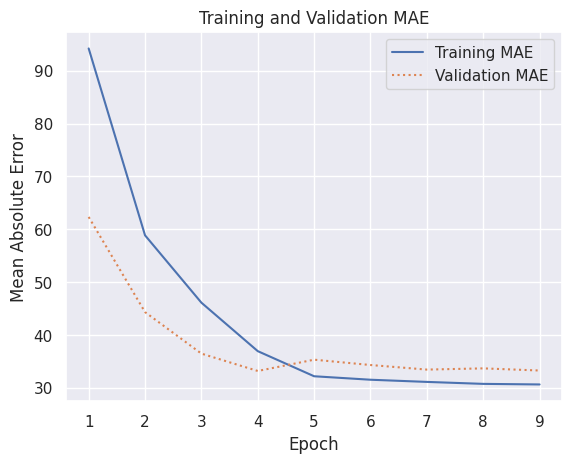

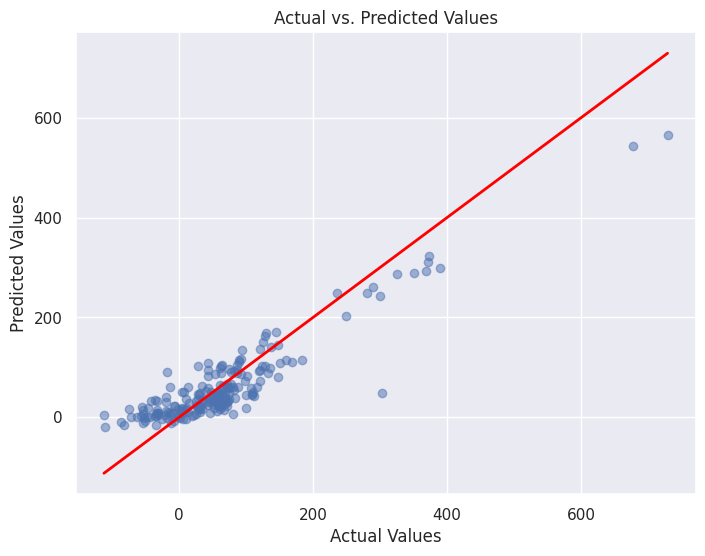

In [279]:
# model training -- choose to use callback function
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
filepath=""

early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)
filepath = "weights.best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
hist = model_3.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=31, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

# model evaluation and plot
sns.set()
err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

y_pred = model_3.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Load model and evaluation
if not filepath =="":
  model_3 = load_model(filepath)
  y_pred = model_3.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")

  # create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha = 0.5)

  # add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # add a diagonal line for reference
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle = '-', color = 'red', lw=2)
  plt.show()

### Model3 Version2: During the training process, Dropout function was used to prevent overfitting

In [280]:
# data processing
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split


url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'
df = pd.read_csv(url)
df = df.iloc[:1000]
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [281]:
# network construction
from tensorflow.keras.layers import PReLU
def construct_network_model():
  model_3 = Sequential()
  model_3.add(Dense(32, activation='relu', input_dim=4))
  model_3.add(Dropout(rate=0.1))
  # model_3.add(Dense(64, activation='softmax'))
  model_3.add(Dense(64, activation='relu'))
  model_3.add(Dense(1))
  return model_3

model_3 = construct_network_model()
# model_3.compile(optimizer=Adam(learning_rate=0.02), loss='mae', metrics=['mae'])
model_3.compile(optimizer='adam', loss='mae', metrics=['mae'])
model_3.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_195 (Dense)           (None, 32)                160       
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_196 (Dense)           (None, 64)                2112      
                                                                 
 dense_197 (Dense)           (None, 1)                 65        
                                                                 
Total params: 2337 (9.13 KB)
Trainable params: 2337 (9.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Epoch 1: val_mae improved from inf to 42.55953, saving model to weights.best.h5

Epoch 2: val_mae improved from 42.55953 to 35.91368, saving model to weights.best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae improved from 35.91368 to 31.32238, saving model to weights.best.h5

Epoch 4: val_mae did not improve from 31.32238

Epoch 5: val_mae did not improve from 31.32238

Epoch 6: val_mae did not improve from 31.32238

Epoch 7: val_mae did not improve from 31.32238

Epoch 8: val_mae did not improve from 31.32238
7/7 [==============================] - 0s 2ms/step
--------------------------------------this is result of the trained model---------------------------------------------
Mean Absolute Error: 33.49013614654541
Mean Squared Error: 2079.336775427955
R-squared: 0.8237550036124834
7/7 [==============================] - 0s 2ms/step
--------------------------------------this is result of the model loaded from the local path---------------------------------------------
Mean Absolute Error: 33.49013614654541
Mean Squared Error: 2079.336775427955
R-squared: 0.8237550036124834


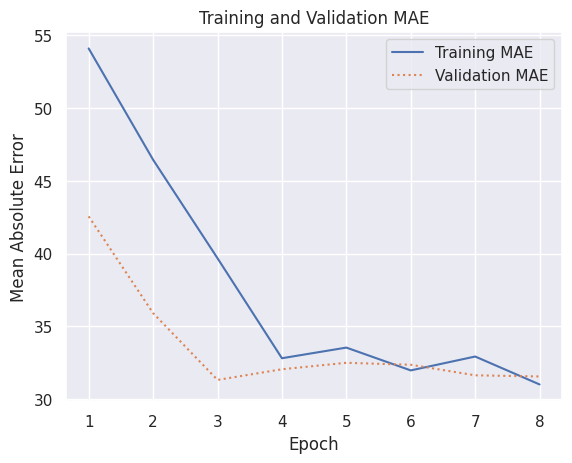

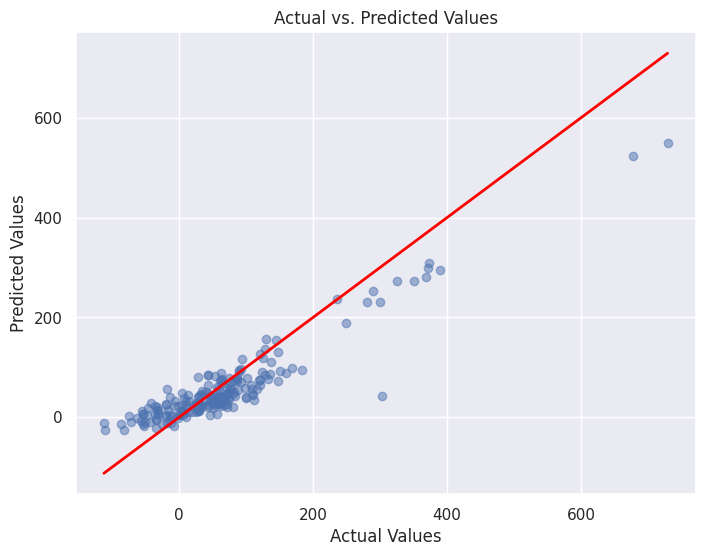

In [282]:
# model training -- choose to use callback function
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
filepath=""

early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)
filepath = "weights.best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
hist = model_3.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=31, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

# model evaluation and plot
sns.set()
err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

y_pred = model_3.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Load model and evaluation
if not filepath =="":
  model_3 = load_model(filepath)
  y_pred = model_3.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")

  # create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha = 0.5)

  # add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # add a diagonal line for reference
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle = '-', color = 'red', lw=2)
  plt.show()

### Module 4

In [283]:
# data processing
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split


url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'
df = pd.read_csv(url)
df = df.iloc[:1000]
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [284]:
# network construction
from tensorflow.keras.layers import PReLU
def construct_network_model():
  model_3 = Sequential()
  model_3.add(Dense(64, activation='relu', input_dim=4))
  # model_3.add(Dense(64, activation='softmax'))
  model_3.add(Dropout(rate=0.5))
  model_3.add(Dense(128, activation='relu'))
  model_3.add(Dense(1, activation = 'relu'))
  return model_3

model_3 = construct_network_model()
# model_3.compile(optimizer=Adam(learning_rate=0.02), loss='mae', metrics=['mae'])
model_3.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])
model_3.summary()

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_198 (Dense)           (None, 64)                320       
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_199 (Dense)           (None, 128)               8320      
                                                                 
 dense_200 (Dense)           (None, 1)                 129       
                                                                 
Total params: 8769 (34.25 KB)
Trainable params: 8769 (34.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Epoch 1: val_mae improved from inf to 43.47618, saving model to weights.best.h5

Epoch 2: val_mae improved from 43.47618 to 32.73014, saving model to weights.best.h5

Epoch 3: val_mae did not improve from 32.73014


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_mae did not improve from 32.73014

Epoch 5: val_mae did not improve from 32.73014

Epoch 6: val_mae did not improve from 32.73014

Epoch 7: val_mae did not improve from 32.73014
7/7 [==============================] - 0s 2ms/step
--------------------------------------this is result of the trained model---------------------------------------------
Mean Absolute Error: 35.81087405793369
Mean Squared Error: 2276.618325099766
R-squared: 0.8070333804391157
7/7 [==============================] - 0s 2ms/step
--------------------------------------this is result of the model loaded from the local path---------------------------------------------
Mean Absolute Error: 35.81087405793369
Mean Squared Error: 2276.618325099766
R-squared: 0.8070333804391157


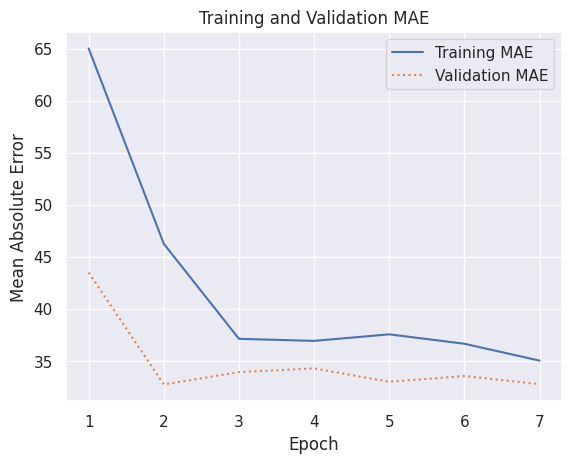

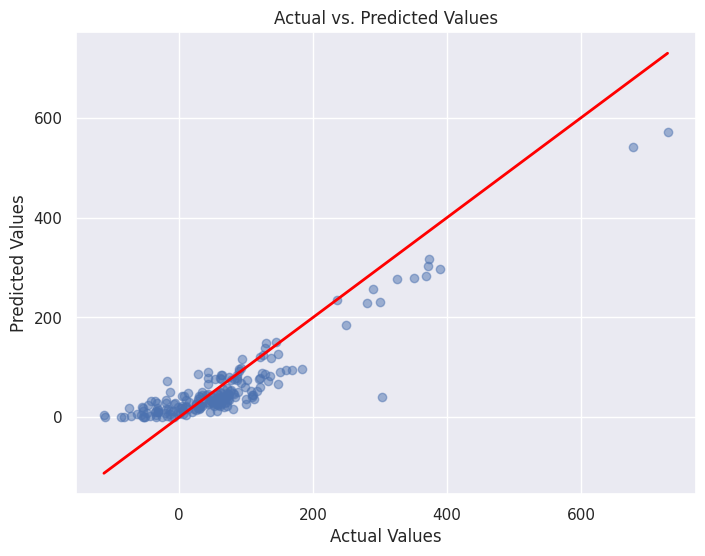

In [285]:
# model training -- choose to use callback function
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
filepath=""

early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)
filepath = "weights.best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
hist = model_3.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=31, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

# model evaluation and plot
sns.set()
err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

y_pred = model_3.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Load model and evaluation
if not filepath =="":
  model_3 = load_model(filepath)
  y_pred = model_3.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")

  # create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha = 0.5)

  # add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # add a diagonal line for reference
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle = '-', color = 'red', lw=2)
  plt.show()